In [ ]:
import matplotlib
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
conn = sqlite3.connect('/content/InternetSpeed.db')
cur = conn.cursor()
df = pd.read_csv('/content/LA_wifi_speed_UK.csv')
df.to_sql('LA_wifi_speed_UK', conn, if_exists='replace', index=False)
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10'

In [ ]:
cur.execute(query)
for row in cur:
    print(row)

('2016-11-23 00:00:00',)
('2016-11-23 00:30:00',)
('2016-11-23 01:00:00',)
('2016-11-23 01:30:00',)
('2016-11-23 02:00:00',)
('2016-11-23 02:30:00',)
('2016-11-23 03:00:00',)
('2016-11-23 03:30:00',)
('2016-11-23 04:00:00',)
('2016-11-23 04:30:00',)


In [ ]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)
for row in cur:
    print(row)


('2016-11-24 03:00:00',)
('2016-11-30 15:30:00',)
('2016-12-04 22:00:00',)
('2016-11-29 11:30:00',)
('2016-11-28 02:30:00',)
('2016-11-27 14:30:00',)
('2016-12-08 16:00:00',)
('2016-11-25 19:00:00',)
('2016-11-26 01:30:00',)
('2016-12-03 05:30:00',)


**PASO2**

In [ ]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [ ]:
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [ ]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)
columns = [member[0] for member in cur.description]

In [ ]:
#ejemplo
'chestnut'.replace('es', '')

'chtnut'

In [ ]:
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]
columns = list(set(columns))
Tiempo: columns.remove('DateTime')

In [ ]:
area = columns[0]
print(area)

E07000145


In [ ]:
#ejemplo
'We are considering {} area and {} statistics'.format(1, 3)


'We are considering 1 area and 3 statistics'

In [ ]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000145')

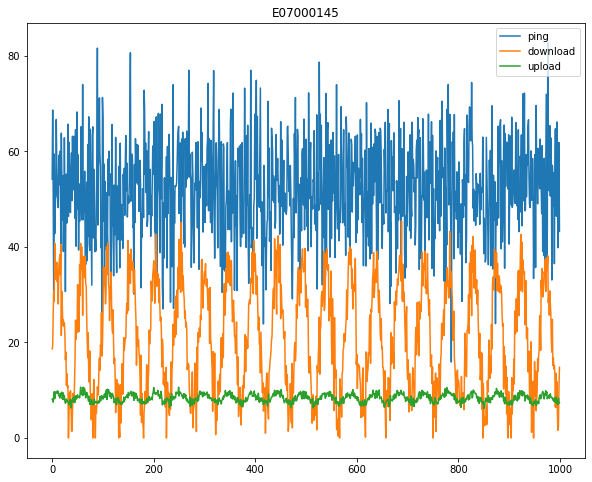

In [ ]:
#ejemplo
area = columns[0]
plt.figure(figsize=(10, 8))
for s in suffix.keys():
    query = 'SELECT '+area+s+' FROM LA_wifi_speed_UK'
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [ ]:
query = 'SELECT * FROM LA_wifi_speed_UK'
cur.execute(query)
print(len(cur.description))
print(len(list(cur)))


979
1000


In [ ]:
#ejemplo
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]

areas = list(set(columns))
areas.remove('DateTime')


In [ ]:
plt.figure(figsize=(10, 8))
for a in areas():
    query ='SELECT '+a+' _d FROM LA_wifi_speed_UK ORDER BY DateTime'
    cur.execute(query)
    plt.plot(cur.fetchall())
plt.title("Download")

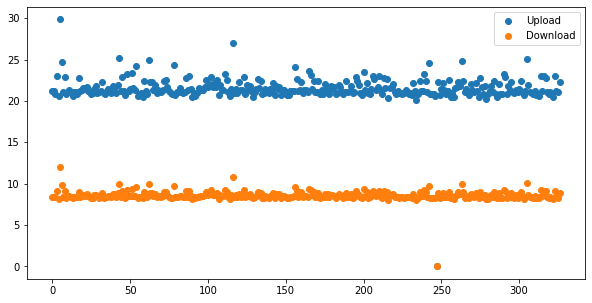

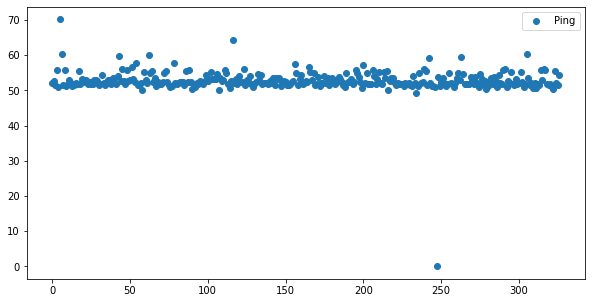

In [ ]:
new_columns = ['Area','Average_p','Average_u','Average_d']
df = pd.DataFrame(columns = new_columns)
df.head()

columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]

areas = list(set(columns))

for a in areas:
    tmp_list = []
    tmp_list.append(a)
    for s in suffix.keys():
        query = 'SELECT AVG ("{}{}") FROM LA_wifi_speed_UK'.format(a , s )
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
        #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)

plt.figure(figsize=(10,5))
plt.plot(df.index, df[ [ 'Average_u' , 'Average_d' ] ], 'o')
plt.legend([ 'Upload' ,'Download' ])

plt.figure(figsize=(10,5))
plt.plot(df.index, df[ 'Average_p' ], 'o')
plt.legend([ 'Ping' ])